In [1]:
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb

In [23]:
myDF = sb.load_dataset("iris")
myDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
myDF["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [25]:
species_to_target = {
    "setosa" : 1,
    "versicolor" : 2,
    "virginica" : 3 
}

myDF["target"] = myDF["species"].apply(lambda x : species_to_target[x])
myDF

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


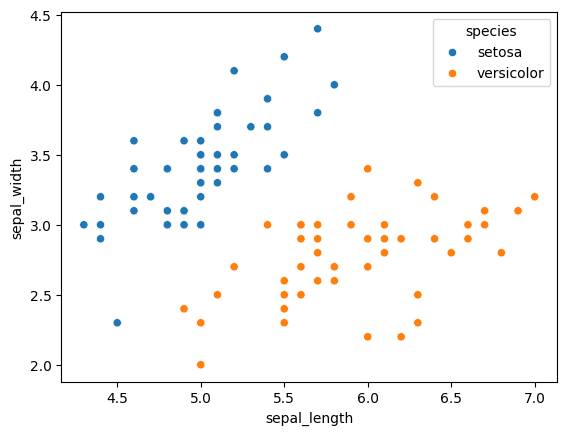

In [26]:
sb.scatterplot(data=myDF[:100],x="sepal_length",y="sepal_width",hue="species")
mat.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(myDF[['sepal_length','sepal_width','petal_length','petal_width']],myDF.target,test_size=0.1)

In [28]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
17,5.1,3.5,1.4,0.3
43,5.0,3.5,1.6,0.6
35,5.0,3.2,1.2,0.2
65,6.7,3.1,4.4,1.4
36,5.5,3.5,1.3,0.2
...,...,...,...,...
133,6.3,2.8,5.1,1.5
87,6.3,2.3,4.4,1.3
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3


In [29]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
140,6.7,3.1,5.6,2.4
125,7.2,3.2,6.0,1.8
147,6.5,3.0,5.2,2.0
12,4.8,3.0,1.4,0.1
54,6.5,2.8,4.6,1.5
13,4.3,3.0,1.1,0.1
42,4.4,3.2,1.3,0.2
2,4.7,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
80,5.5,2.4,3.8,1.1


In [30]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model

SVC(kernel='linear')

In [32]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
model.predict(X_test)

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 2, 2, 3, 2, 3, 1])

In [34]:
model.score(X_test,y_test)

1.0